In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt

BBECA = gpd.read_file('BB_Data/Spatial/ECOSYS_REV_TEM.shp')
BBECA = BBECA[['PRISTINE', 'ECO', 'MAP_UNIT', 'geometry']]

Classes = {
    'Water Lily - Watersh':'Water',
    'Herb. veg on dist. p':'Other',
    'Open Water':'Water',
    'Cultivated Field':'Other',
    'Disturbed Surface':'Other',
    'Hardhack Thicket':'Other',
    'Birch Forest':'Forested',
    'Mixed Conifer Forest':'Forested',
    'Pine-Salal Forest':'Forested',
    'Pine Sphagnum Woodla':'Pine - Sphagnum',
    'Beakrush - Three-way':'Sedge - Sphagnum',
    'Pine Sphagnum Tall S':'Pine - Sphagnum',
    'Beakrush - Sphagnum':'Sedge - Sphagnum',
    'Pine Sphagnum Low Sh':'Pine - Sphagnum'
}

BBECA['Class'] = BBECA['MAP_UNIT']
BBECA['Class'] = BBECA['Class'].replace(Classes)

BBECA.loc[BBECA['Class']=='Other','MAP_UNIT']='Other'
# BBECA['Class']=BBECA['Other']

BBECA['AREA_sqKM']=BBECA.area.values/1e6


Towers = gpd.read_file('BB_Data/Spatial/Towers.shp')
Towers.loc[Towers['Name']=='Sapling_NoTreatment','Name']='BBS'
Towers['X'] = Towers.geometry.x
Towers['Y'] = Towers.geometry.y

Burn = gpd.read_file('BB_Data/Spatial/SeedlingRemoval.shp')

Chambers = gpd.read_file('BB_Data/Spatial/Chamber_Sites_2016_Burn_Zone.shp')



In [70]:
Eco = BBECA[['Class','AREA_sqKM']].groupby(['Class']).sum()
Eco['Pct']=Eco['AREA_sqKM']/Eco['AREA_sqKM'].sum()
Eco = Eco.sort_values(by='Pct',ascending=False)
Eco.to_csv('BB_Data/Ecosystem_Summary.csv')

Colors =['#f5b042','#87f542','#193d02','#bcbec2','#053ba8']

Colormap = {}
for i,c in zip(Eco.index,Colors):
    Colormap[i] = c

Eco




,AREA_sqKM,Pct
Class,,
Pine - Sphagnum,14.106852,0.471760
Sedge - Sphagnum,6.954329,0.232566
Forested,4.758970,0.159149
Other,3.277381,0.109602
Water,0.805043,0.026922


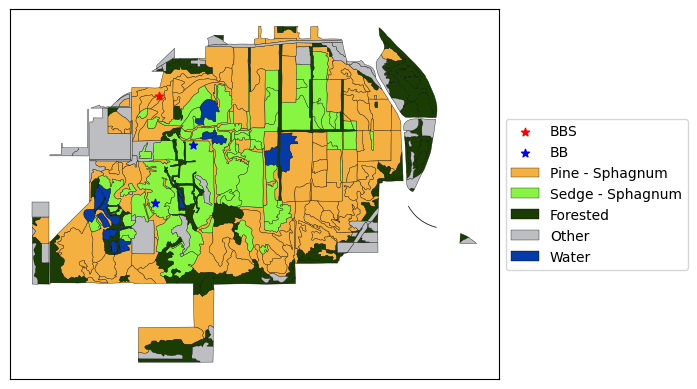

In [87]:
import matplotlib.patches as mpatches

fig,ax = plt.subplots()
Class_Patches = []
for Eco_type in Eco.index:
    kwargs = {
        'facecolor':Colormap[Eco_type],
        'linewidth':.25,
        'edgecolor':'k'
        }
    BBECA.loc[BBECA['Class']==Eco_type].plot(ax=ax,**kwargs)
    patch = mpatches.Patch(label=Eco_type,**kwargs)
    Class_Patches.append(patch)

BBS = Towers.loc[Towers['Name']=='BBS']
ax.scatter(BBS['X'],BBS['Y'],marker='*',color='r',label='BBS')
BB = Towers.loc[Towers['Name']!='BBS']
ax.scatter(BB['X'],BB['Y'],marker='*',color='b',label='BB')

Class_Patches = ax.get_legend_handles_labels()[0] + Class_Patches
ax.legend(handles=Class_Patches,loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


      ECO              MAP_UNIT
0    LS5M  Pine Sphagnum Woodla
1     LS5  Pine Sphagnum Woodla
2     BS4          Birch Forest
3     BS5          Birch Forest
4     RF5  Mixed Conifer Forest
..    ...                   ...
323   BS5          Birch Forest
324  LS3a  Pine Sphagnum Low Sh
325   NaN     Disturbed Surface
326   RK5  Mixed Conifer Forest
327  CF3a      Cultivated Field

[328 rows x 2 columns]


,FID_New_Sh,Id,FID_TEM,AREA,PERIMETER,TEM_,TEM_ID,POLYNO,SDEC_1,SITEMC_S1,...,TEMP,TEMP2,SPH_CAT,RARE_AVG,SHAPE_Leng,Relative_C,Shape_Le_1,Shape_Area,geometry,Area
0,0,0,1,36743.4,1132.020,0,0,325,0.0,LS,...,0.0,0.0,0.0,0.0,1132.014988,0.001229,1132.014988,36743.402725,"POLYGON ((502523.750 5443928.500, 502523.750 5...",36743.402725
1,0,0,2,144087.0,4012.370,0,0,2,6.0,LS,...,17.5,7.0,3.0,2.5,4012.374419,0.004819,4012.374419,144087.437250,"POLYGON ((504031.125 5443898.000, 503953.250 5...",144087.437250
2,0,0,3,13745.8,456.104,0,0,326,0.0,BS,...,0.5,0.5,1.0,2.5,456.104395,0.000460,456.104395,13745.801550,"POLYGON ((502866.062 5444164.500, 502871.469 5...",13745.801550
3,0,0,4,19291.2,737.207,0,0,324,0.0,BS,...,0.5,0.5,1.0,2.5,737.206913,0.000645,737.206913,19291.201825,"POLYGON ((503126.438 5444165.500, 503124.344 5...",19291.201825
4,0,0,5,237700.0,5060.100,0,0,4,0.0,RF,...,0.0,0.0,0.0,2.0,5060.104511,0.007949,5060.104511,237699.842875,"POLYGON ((505809.406 5442370.000, 505821.781 5...",237699.842875


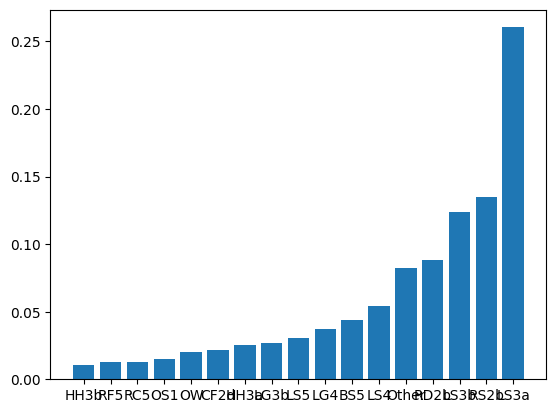

In [5]:

fig,ax = plt.subplots()
BBECA['Area'] = BBECA.area
Ecosystems = BBECA[['Area','ECO']].groupby('ECO').sum()

Ecosystems['Pct'] = Ecosystems['Area']/Ecosystems['Area'].sum()

Ecosystems['Type'] = Ecosystems.index
Ecosystems.loc[Ecosystems['Pct']<.01,'Type']='Other'

Ecosystems=Ecosystems.groupby('Type').sum()

Ecosystems = Ecosystems.sort_values(by='Pct')
ax.bar(Ecosystems.index,Ecosystems['Pct'])

print(BBECA[['ECO','MAP_UNIT']])